# Diabetes Patients Analysis using Python

In [1]:
# Importing Libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats
from scipy.stats import zscore

# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Data Splitting and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Model-Validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve, auc


In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
#Data Pre-processing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# 0 values in insulin, Blood pressure are Null values
df.iloc[:, :-1] = df.iloc[:, :-1].replace(0, pd.NA)

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,<NA>,33.6,0.627,50,1
1,1,85,66,29,<NA>,26.6,0.351,31,0
2,8,183,64,<NA>,<NA>,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,<NA>,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,<NA>,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,<NA>,<NA>,30.1,0.349,47,1


In [7]:
#replacing null with mean
for column in df.columns:
    if df[column].isnull().any():
        column_mean = round(df[column].mean())
        df[column].fillna(column_mean, inplace=True)


In [8]:
#drop duplicates
df.drop_duplicates(inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,156,33.6,0.627,50,1
1,1,85,66,29,156,26.6,0.351,31,0
2,8,183,64,29,156,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,156,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,29,156,30.1,0.349,47,1


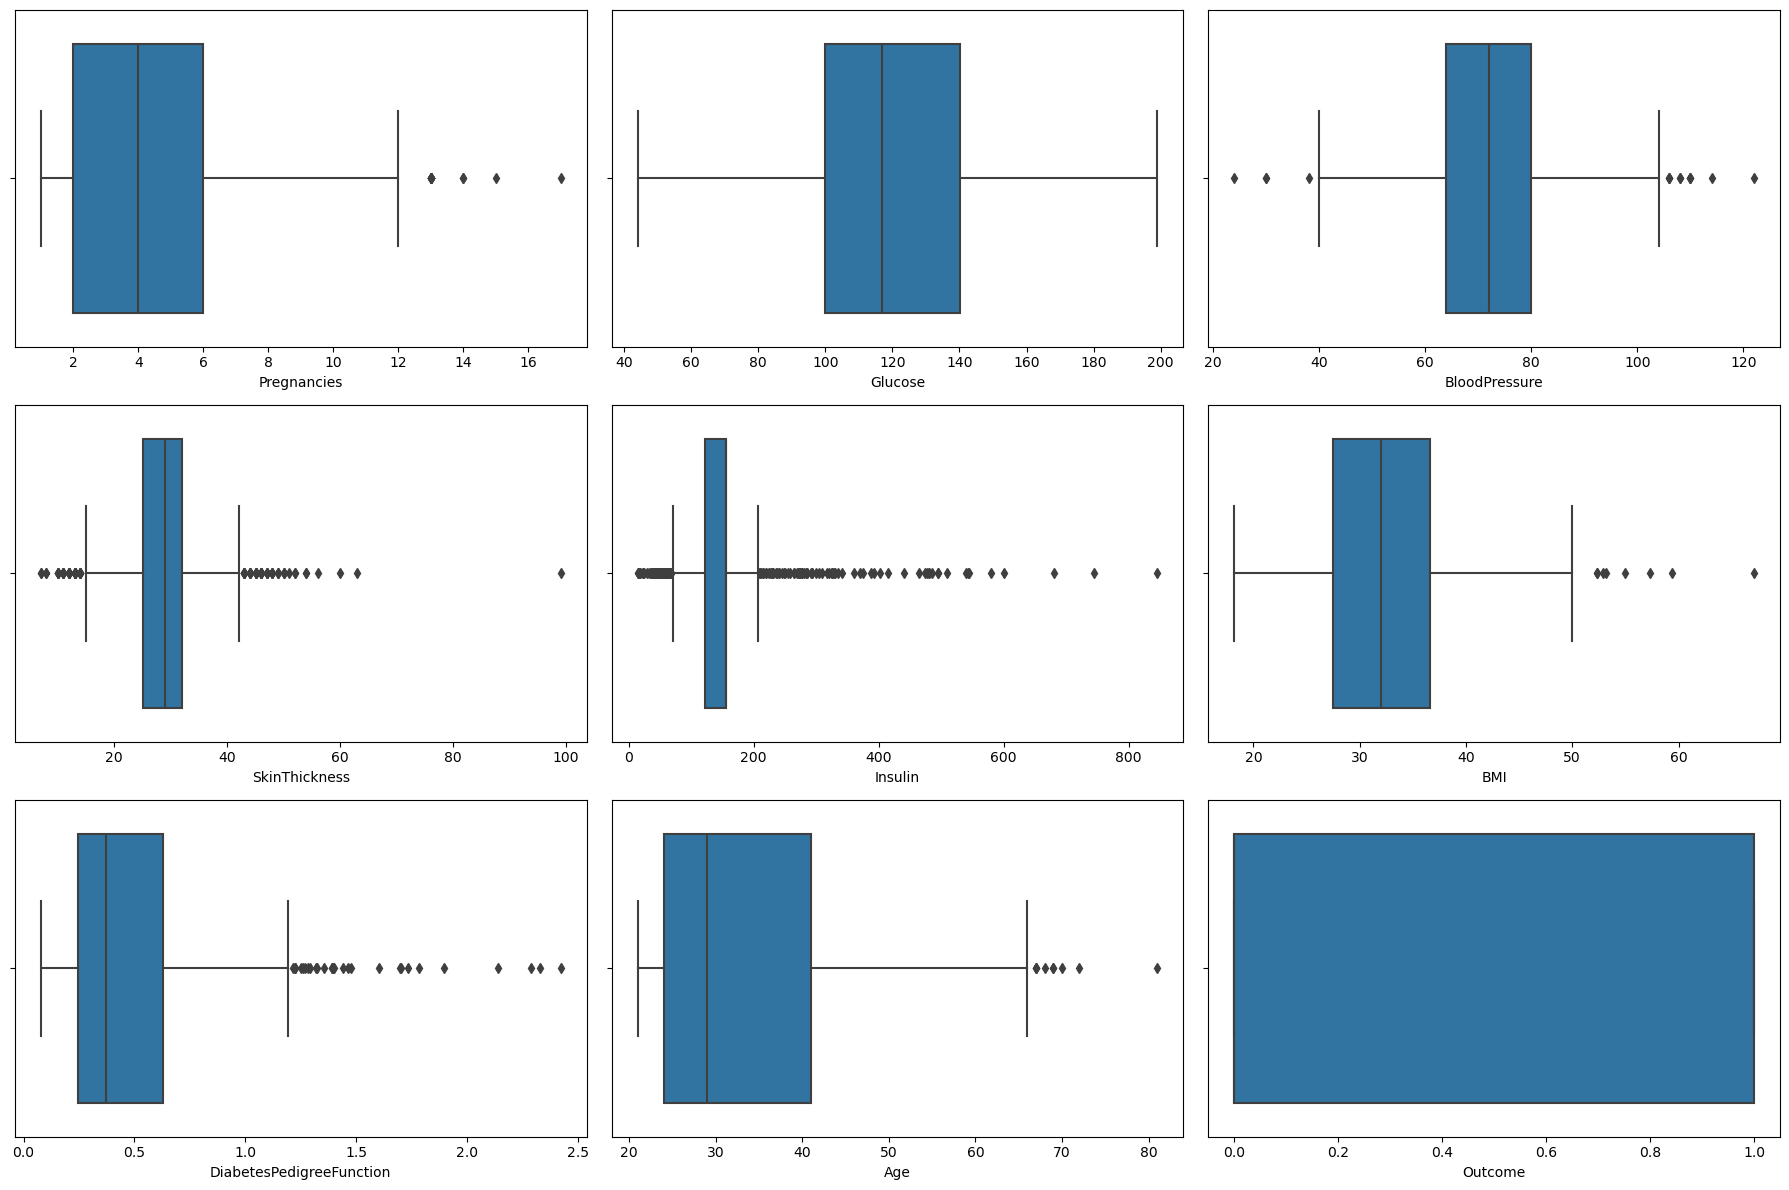

In [9]:
#Outliers Handling
#Check for Outliers
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()
for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], whis=1.5, fliersize=5, ax=axes[i])

plt.tight_layout()

# Show the plot
plt.show()


In [10]:
# Replace outliers with the mean value of the column
z_score_threshold = 3
for column in df.columns:
    z_scores = zscore(df[column])
    outliers = (z_scores > z_score_threshold) | (z_scores < -z_score_threshold)
    column_mean = df[column].mean()

    # Check if the column is integer type and cast accordingly
    if df[column].dtype == 'int64':
        df.loc[outliers, column] = int(column_mean)
    else:
        df.loc[outliers, column] = column_mean


In [11]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,156,33.6,0.627000,50,1
1,1,85,66,29,156,26.6,0.351000,31,0
2,8,183,64,29,156,23.3,0.672000,32,1
3,1,89,66,23,94,28.1,0.167000,21,0
4,4,137,40,35,168,43.1,0.471876,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171000,63,0
764,2,122,70,27,156,36.8,0.340000,27,0
765,5,121,72,23,112,26.2,0.245000,30,0
766,1,126,60,29,156,30.1,0.349000,47,1


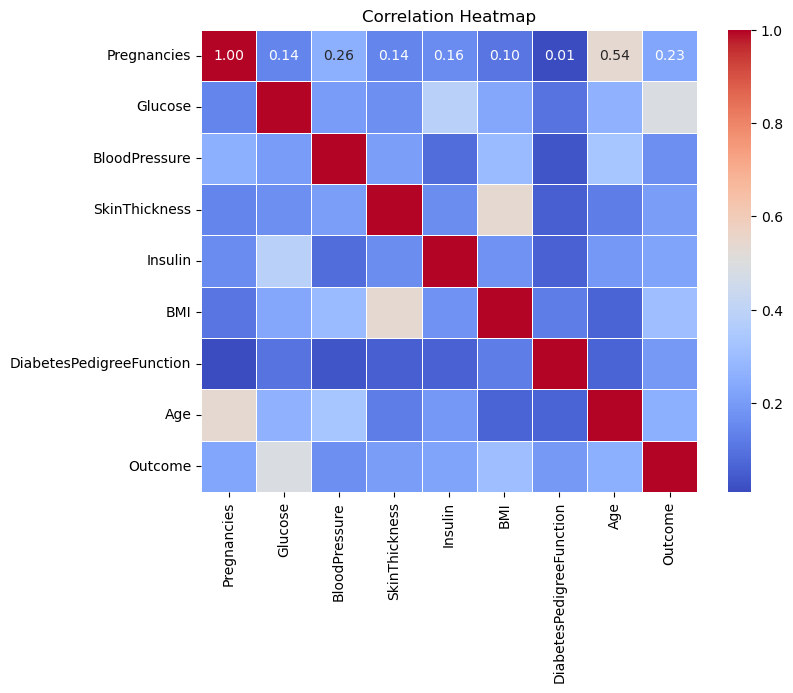

In [12]:
# Calculating correlation matrix
correlation_matrix = df.corr()

# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()



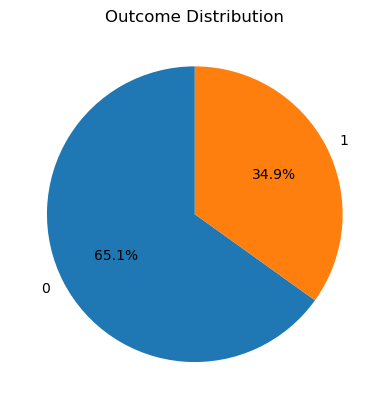

In [13]:
#Check for class imbalance
outcome_counts = df['Outcome'].value_counts()

# Create a pie chart
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Outcome Distribution')
plt.show()

In [14]:
#split training / testing data
columns_to_drop = ["Outcome"]

X = df.drop(columns_to_drop, axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=30)

In [15]:
# Model Creation

#KNN
knn_classifier = KNeighborsClassifier(weights='distance') 
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.80      0.81       130
           1       0.59      0.61      0.60        62

    accuracy                           0.74       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.74      0.74      0.74       192



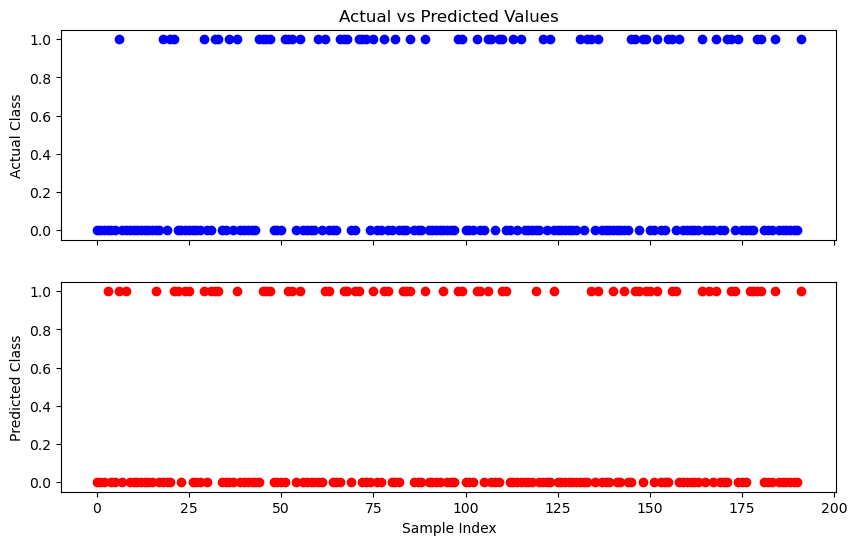

In [16]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# Scatter plot for actual values (blue)
ax1.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual Values')
ax1.set_ylabel('Actual Class')
ax1.set_title('Actual vs Predicted Values')

# Scatter plot for predicted values (red)
ax2.scatter(np.arange(len(y_test)), y_pred, color='red', label='Predicted Values')
ax2.set_xlabel('Sample Index')
ax2.set_ylabel('Predicted Class')

# Adding labels and title
plt.xlabel('Sample Index')

plt.show()


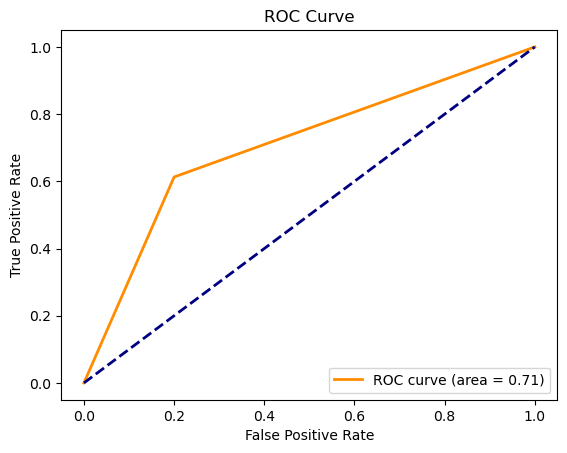

In [17]:
#ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
